FEATURES EXPLANATION FOR IEEE ONLINE FRAUD

**Transaction Table **

TransactionDT: timedelta from a given reference datetime (not an actual timestamp)

TransactionAMT: transaction payment amount in USD

ProductCD: product code, the product for each transaction

card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.

addr: address

dist: distance

P_ and (R__) emaildomain: purchaser and recipient email domain

C1-C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.

D1-D15: timedelta, such as days between previous transaction, etc.

M1-M9: match, such as names on card and address, etc.

Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

**Categorical Features*:

ProductCD

card1 - card6

addr1, addr2

P_emaildomain

R_emaildomain

M1 - M9

**Identity Table**

Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

**Categorical Features*:

DeviceType

DeviceInfo

id_12 - id_38

In [99]:
# important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import gc
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

The train dataset has already between splitted into 70 : 30 percent train and test dataset. This data preprocessing will be done on only train dataset while the Test dataset will be used in future. Note the train transaction dataset has been merged with Identity transaction dataset before splitting.

In [100]:
#load datasets
df_train = pd.read_csv('train_data.csv')



**DATA EXPLORATION**

In [80]:
# display 5 rows
df_train.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
0,2992307,174911,59.000,W,4988,334.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,3178582,4301977,23.378,C,3867,296.0,185.0,visa,226.0,credit,...,NaN,NaN,NaN,F,F,T,F,desktop,NaN,0
2,3247168,6229929,35.950,W,12577,268.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
#info dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472432 entries, 0 to 472431
Columns: 434 entries, TransactionID to isFraud
dtypes: float64(399), int64(4), object(31)
memory usage: 1.5+ GB


In [5]:
#check for null values
df_train.isnull().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
                   ...  
id_37             359671
id_38             359671
DeviceType        359813
DeviceInfo        377531
isFraud                0
Length: 434, dtype: int64

In [39]:
# to know the number of rows and columns
df_train.shape

(472432, 434)

**VISUALIZATION**

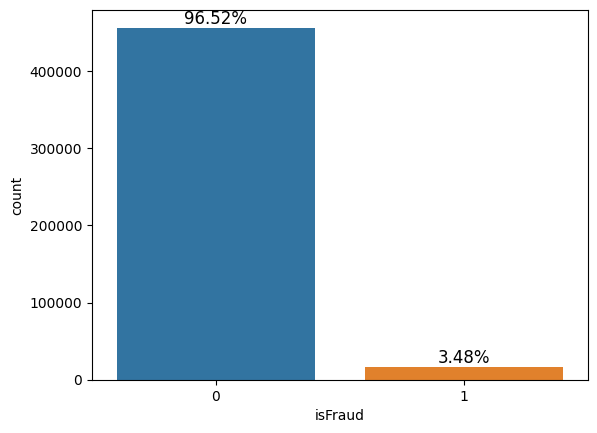

In [8]:
# data imbalance
# Create the countplot
sns.countplot(x='isFraud', data=df_train)

# Calculate percentages
total = len(df_train)
fraud_count = df_train['isFraud'].sum()
non_fraud_count = total - fraud_count

fraud_percentage = (fraud_count / total) * 100
non_fraud_percentage = (non_fraud_count / total) * 100

# plot with percentages of Fraud and not Fraud in the dataset
plt.text(1, fraud_count, f'{fraud_percentage:.2f}%', ha='center', va='bottom', fontsize=12)
plt.text(0, non_fraud_count, f'{non_fraud_percentage:.2f}%', ha='center', va='bottom', fontsize=12)

plt.show()

DeviceType
desktop    68030
mobile     44589
Name: count, dtype: int64

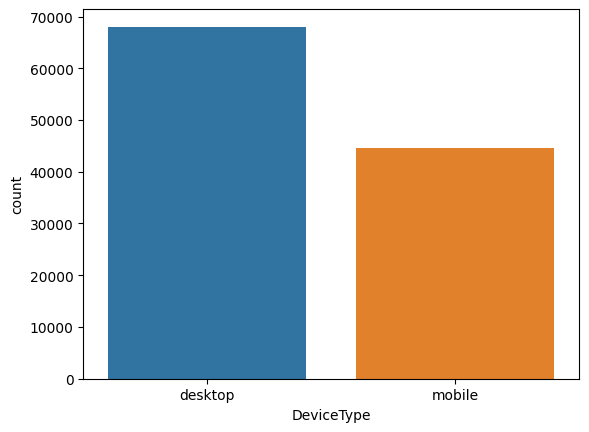

In [9]:
# plot type of devices used the most in the train dataset
sns.countplot(x=df_train["DeviceType"])

df_train['DeviceType'].value_counts()

DeviceInfo
Windows        38119
iOS Device     15817
MacOS          10078
Trident/7.0     5914
rv:11.0         1507
               ...  
GT-S7582L          1
LG-H933            1
D5306              1
STV100-3           1
SM-P600            1
Name: count, Length: 1693, dtype: int64


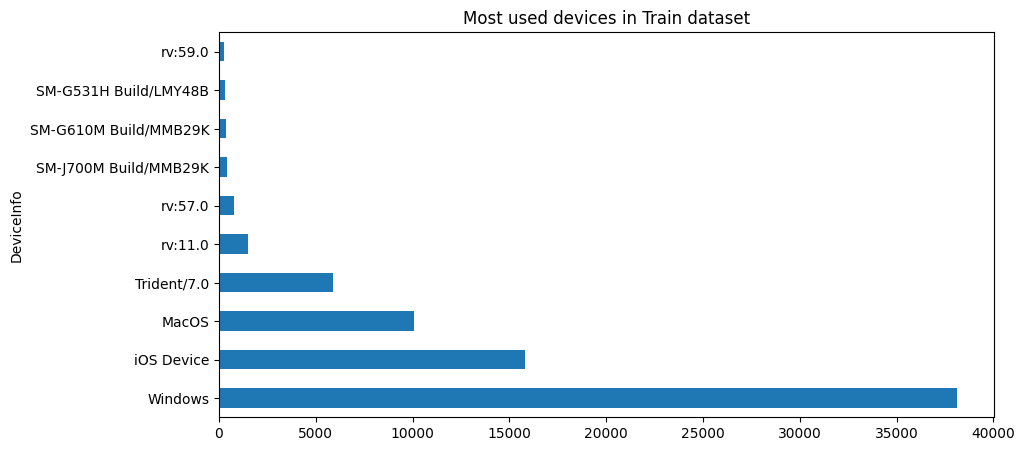

In [10]:
# plot the top 10 devices that where used for the transactions in the train dataset

most_devices = df_train['DeviceInfo'].value_counts()

df_train['DeviceInfo'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Most used devices in Train dataset')

print(most_devices)
plt.show()


ProductCD
W    351741
C     54960
R     30139
H     26372
S      9220
Name: count, dtype: int64

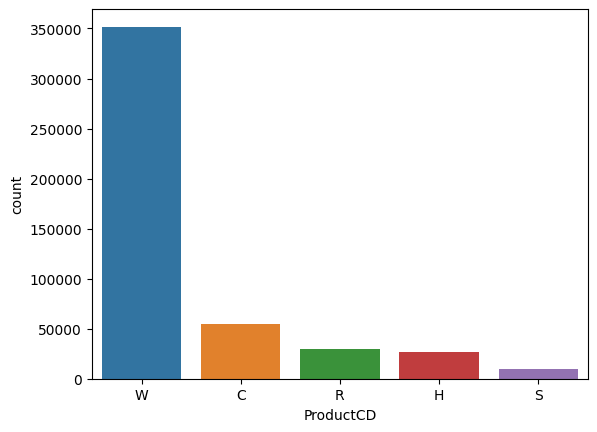

In [11]:
# plot the Prodcut code for each train dataset
sns.countplot(x=df_train['ProductCD'])

df_train['ProductCD'].value_counts()

ProductCD
C    6336
H    1254
R    1121
S     532
W    7178
Name: isFraud, dtype: int64


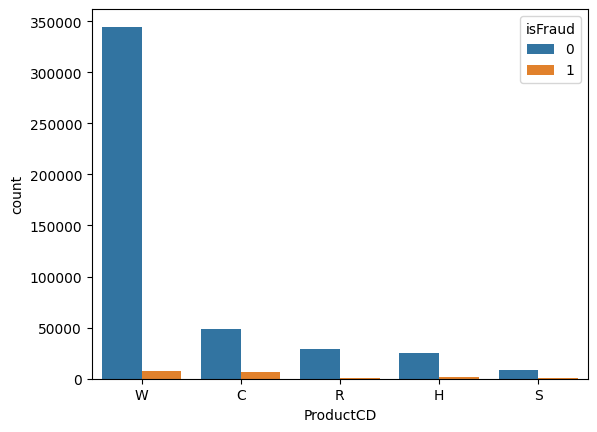

In [12]:
# plot number of ProductDC that were declared fraud in the train dataset
sns.countplot(data=df_train,x='ProductCD',hue='isFraud')

isfraud_ProdCD = df_train.groupby("ProductCD")["isFraud"].sum()

print(isfraud_ProdCD)
plt.show()



card4
visa                308015
mastercard          151119
american express      6695
discover              5340
Name: count, dtype: int64

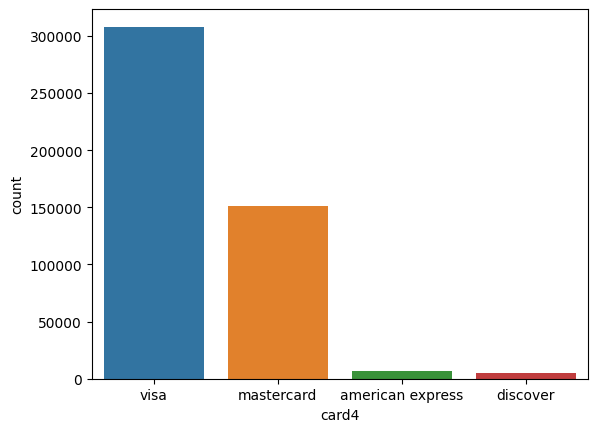

In [13]:
# to show the most used Brand of electronic cards for transaction in the train dataset
sns.countplot(x=df_train["card4"])

df_train["card4"].value_counts()

card6
debit              351947
credit             119193
debit or credit        24
charge card            10
Name: count, dtype: int64

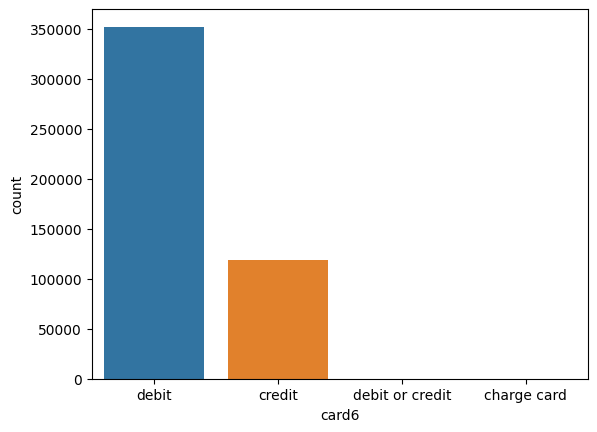

In [14]:
# to show the most used electronic cards (debit or credit) for transaction in the train dataset
sns.countplot(x=df_train["card6"])

df_train["card6"].value_counts()

P_emaildomain
gmail.com        182797
yahoo.com         80828
hotmail.com       36331
anonymous.com     29588
aol.com           22503
comcast.net        6332
icloud.com         5007
outlook.com        4039
msn.com            3264
att.net            3238
Name: count, dtype: int64

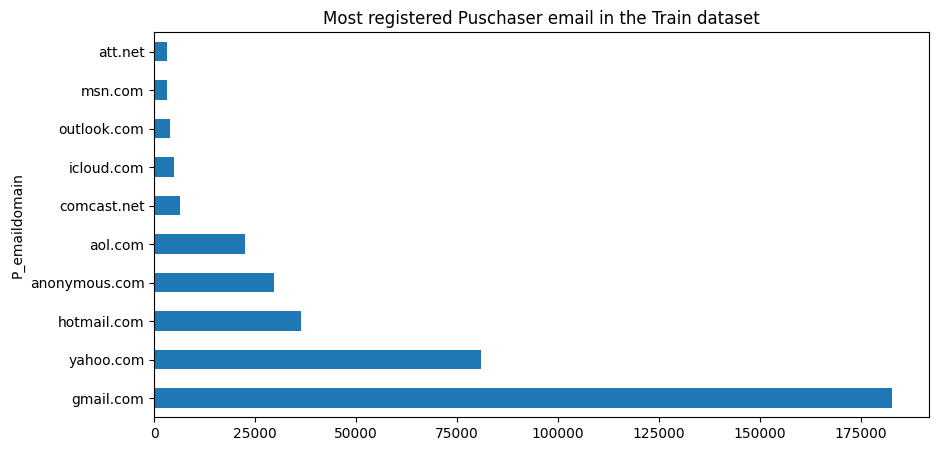

In [15]:
# to show the most used email domain for registration by the Purchaser
df_train['P_emaildomain'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Most registered Puschaser email in the Train dataset')

df_train['P_emaildomain'].value_counts()[:10]

R_emaildomain
gmail.com        45627
hotmail.com      22062
anonymous.com    16446
yahoo.com         9504
aol.com           2962
outlook.com       1998
comcast.net       1447
yahoo.com.mx      1208
icloud.com        1109
msn.com            665
Name: count, dtype: int64

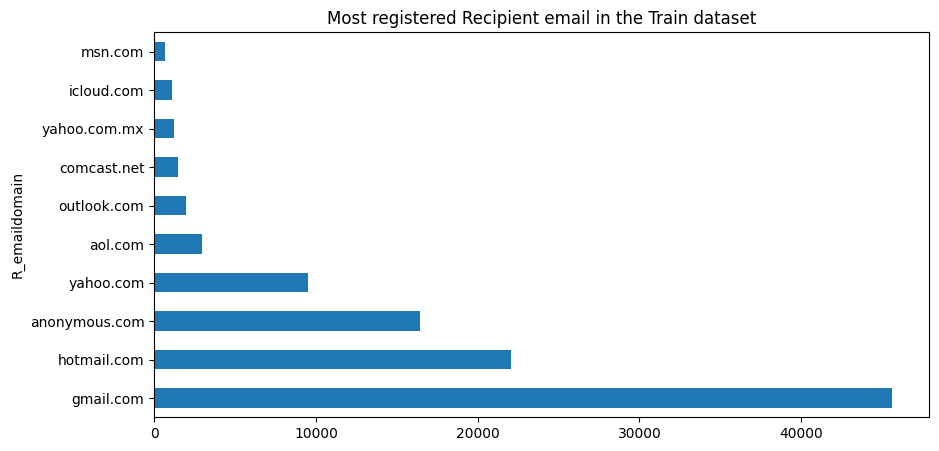

In [16]:
# to show the most used email domain for registration by the Recipient
df_train['R_emaildomain'].value_counts().head(10).plot(kind='barh', figsize=(10, 5), title='Most registered Recipient email in the Train dataset')

df_train['R_emaildomain'].value_counts()[:10]

In [17]:
#Count of how many times emails where used
isfraud_ProdCD = df_train.groupby("P_emaildomain")["isFraud"].sum().sort_values(ascending=False)
print(isfraud_ProdCD)


P_emaildomain
gmail.com           7937
hotmail.com         1878
yahoo.com           1829
anonymous.com        687
aol.com              483
outlook.com          387
comcast.net          200
icloud.com           152
mail.com              80
live.com              70
msn.com               68
outlook.es            47
ymail.com             46
bellsouth.net         45
aim.com               34
live.com.mx           29
cox.net               26
protonmail.com        25
me.com                22
att.net               22
charter.net           22
verizon.net           17
hotmail.es            17
optonline.net         13
yahoo.com.mx          12
sbcglobal.net         10
mac.com               10
earthlink.net          9
gmail                  8
embarqmail.com         7
frontier.com           7
juno.com               5
yahoo.fr               4
cableone.net           3
frontiernet.net        3
suddenlink.net         3
roadrunner.com         3
yahoo.es               2
rocketmail.com         2
prodigy.net

In [18]:
#top 10 emails used
isfraud_ProdCD = df_train.groupby("P_emaildomain")["isFraud"].sum().sort_values(ascending=False)
top_10 = isfraud_ProdCD.head(10)
print(top_10)

P_emaildomain
gmail.com        7937
hotmail.com      1878
yahoo.com        1829
anonymous.com     687
aol.com           483
outlook.com       387
comcast.net       200
icloud.com        152
mail.com           80
live.com           70
Name: isFraud, dtype: int64


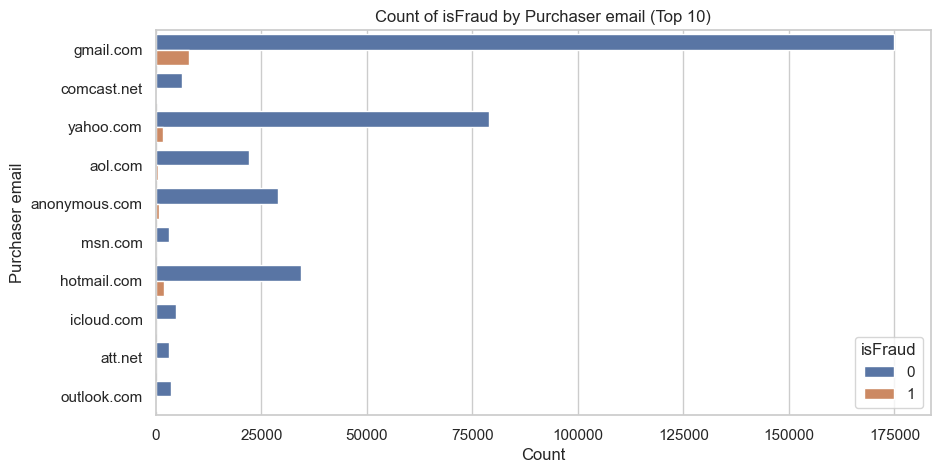

In [19]:
# Get the top 10 P_emaildomain values by count
top_10_P_emaildomains = df_train['P_emaildomain'].value_counts().head(10).index

# Filter the data to include only the top 10 P_emaildomain values
filtered_data = df_train[df_train['P_emaildomain'].isin(top_10_P_emaildomains)]

sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(data=filtered_data, y='P_emaildomain', hue='isFraud')
plt.xlabel('Count')
plt.ylabel('Purchaser email')
plt.title('Count of isFraud by Purchaser email (Top 10)')
plt.show()



Handling missing values

In [102]:
# to know the % and total number of missing values in each colum
missing_train = df_train.isnull().sum().to_frame()
percent_missing = (df_train.isnull().sum()/df_train.isnull().count()*100).round(2) # round to 2 decimal places

pd.concat([missing_train, percent_missing], axis=1, keys=['Total Missing Values', 'Percent']).transpose()

,,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
Total Missing Values,0,0.0,0.0,0.0,0.0,0.0,7178.00,1253.00,1263.00,3399.00,1258.00,...,410511.00,413899.00,410311.00,359671.00,359671.00,359671.00,359671.00,359813.00,377531.00,0.0
Percent,0,0.0,0.0,0.0,0.0,0.0,1.52,0.27,0.27,0.72,0.27,...,86.89,87.61,86.85,76.13,76.13,76.13,76.13,76.16,79.91,0.0


DROP FEATURES WITH MORE THAN 70% MISSING VALUES

In [103]:
# Set a threshold for the percentage of missing values to drop columns
threshold = 70

# Find columns with missing values exceeding the threshold
columns_to_drop = percent_missing[percent_missing > threshold].index

# Drop the columns with excessive missing values
df_train = df_train.drop(columns=columns_to_drop)

In [104]:
df_train.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,isFraud
0,2992307,174911,59.000,W,4988,334.0,150.0,visa,226.0,debit,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0
1,3178582,4301977,23.378,C,3867,296.0,185.0,visa,226.0,credit,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0
2,3247168,6229929,35.950,W,12577,268.0,150.0,visa,166.0,debit,...,35.950001,35.950001,35.950001,0.0,0.0,0.0,0.0,34.950001,34.950001,0
3,3005516,497176,100.000,R,6019,583.0,150.0,visa,226.0,credit,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0
4,3034538,1124702,75.000,H,16075,514.0,150.0,mastercard,102.0,credit,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0


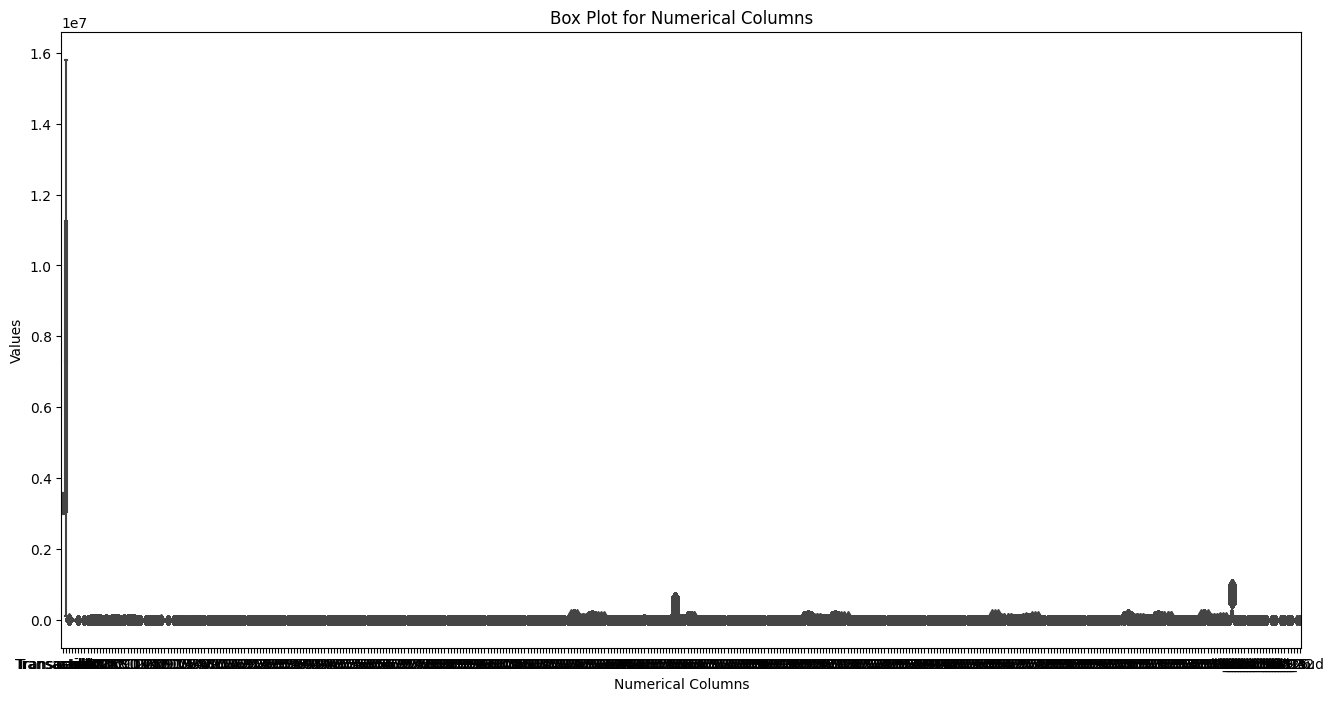

In [23]:
# Due to big data set, the plot does not show factual visualization
'''
# Assuming df_train is your dataframe
# You can replace it with your actual dataframe name
df_train_numeric = df_train.select_dtypes(include=[np.number])

# Set the size of the plot
plt.figure(figsize=(16, 8))

# Create box plots for each numerical column
sns.boxplot(data=df_train_numeric)

# Set the title and labels
plt.title('Box Plot for Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Values')

# Show the plot
plt.show()
'''

In [27]:
df_train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,isFraud
5,3049390,1428785,47.95,W,6019,583.0,150.0,visa,226.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9,3310478,8015970,39.00,W,8691,599.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
26,3294997,7665575,40.00,W,3605,514.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
43,3231464,5799745,117.00,W,13481,199.0,150.0,mastercard,224.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
45,3532725,14407256,87.95,W,5374,170.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [28]:
df_train.shape

(53275, 434)

In [ ]:
# Handling missing numerical values in Train data

# for i in df_train.columns:
#    if df_train[i].dtypes=='int64' or df_train[i].dtypes=='float64':
#        df_train[i].fillna(df_train[i].mean(),inplace=True)

In [ ]:
# Handling missing categorical values in Train data
#for i in df_train.columns:
#    if df_train[i].dtypes=='object':
#        df_train[i].fillna(df_train[i].mode()[0],inplace=True)

In [61]:
'''
# Remove numeric outliers by using interquartile range
def remove_outliers_iqr(df, multiplier=1.5):
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]

    # Calculate the first and third quartiles (Q1 and Q3) for numeric columns
    Q1 = df_numeric.quantile(0.25)
    Q3 = df_numeric.quantile(0.75)

    # Calculate the interquartile range (IQR) for numeric columns
    IQR = Q3 - Q1

    # Create a mask to filter out outliers for each numeric column
    outlier_mask = ((df_numeric < (Q1 - multiplier * IQR)) | (df_numeric > (Q3 + multiplier * IQR))).any(axis=1)

    # Remove rows with outliers
    df_no_outliers = df[~outlier_mask]

    return df_no_outliers

# Assuming df_train is your dataframe
df_train = remove_outliers_iqr(df_train)
'''



In [105]:

# Remove numeric outliers by using interquartile range
def remove_outliers_iqr(df, multiplier=1.5, target_column='isFraud'):
    # Exclude non-numeric columns
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df_numeric = df[numeric_columns]

    # Exclude the target column and columns with 0 and 1 values
    numeric_columns_to_exclude = df_numeric.columns[(df_numeric.nunique() == 2) & (df_numeric.min() == 0) & (df_numeric.max() == 1)]
    exclude_columns = [target_column] + numeric_columns_to_exclude.tolist()
    df_numeric = df_numeric.drop(columns=exclude_columns, errors='ignore')

    # Calculate the first and third quartiles (Q1 and Q3) for numeric columns
    Q1 = df_numeric[df[target_column] == 0].quantile(0.25)
    Q3 = df_numeric[df[target_column] == 0].quantile(0.75)

    # Calculate the interquartile range (IQR) for numeric columns
    IQR = Q3 - Q1

    # Create a mask to filter out outliers for each numeric column
    outlier_mask = ((df_numeric < (Q1 - multiplier * IQR)) | (df_numeric > (Q3 + multiplier * IQR))).any(axis=1)

    # Remove rows with outliers
    df_no_outliers = df[~outlier_mask]

    return df_no_outliers

# Assuming df_train is your dataframe
df_train = remove_outliers_iqr(df_train, target_column='isFraud')








In [86]:
df_train.head(5)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,isFraud
5,3049390,1428785,47.95,W,6019,583.0,150.0,visa,226.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,3310478,8015970,39.00,W,8691,599.0,150.0,visa,166.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26,3294997,7665575,40.00,W,3605,514.0,150.0,mastercard,224.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
43,3231464,5799745,117.00,W,13481,199.0,150.0,mastercard,224.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45,3532725,14407256,87.95,W,5374,170.0,150.0,mastercard,117.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [106]:
# Handling missing numerical values in Train data
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
df_train[numeric_columns] = df_train[numeric_columns].fillna(df_train[numeric_columns].mean())



In [107]:
# Handling missing numerical values in Train data
numeric_columns = df_train.select_dtypes(include=[np.number]).columns
df_train.loc[:, numeric_columns] = df_train.loc[:, numeric_columns].fillna(df_train[numeric_columns].mean())

In [108]:
# display 5 rows
df_train.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V313,V314,V315,V316,V317,V318,V319,V320,V321,isFraud
5,3049390,1428785,47.95,W,6019,583.0,150.0,visa,226.0,credit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
9,3310478,8015970,39.00,W,8691,599.0,150.0,visa,166.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
26,3294997,7665575,40.00,W,3605,514.0,150.0,mastercard,224.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
43,3231464,5799745,117.00,W,13481,199.0,150.0,mastercard,224.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
45,3532725,14407256,87.95,W,5374,170.0,150.0,mastercard,117.0,debit,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [90]:
# confirm that there are no missing values
df_train.isnull().sum()

TransactionID     0
TransactionDT     0
TransactionAmt    0
ProductCD         0
card1             0
                 ..
V318              0
V319              0
V320              0
V321              0
isFraud           0
Length: 226, dtype: int64

In [13]:
df_train.shape

(472432, 226)

In [16]:
# Define the list of columns to one-hot encode 70% drop features
#categorical_columns = ['ProductCD','card4','card6', 'P_emaildomain',
 #                       'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

# Perform one-hot encoding for the specified columns
#data = pd.get_dummies(df_train, columns=categorical_columns)

In [ ]:
# Define the list of columns to one-hot encode 86% dropped features
# categorical_columns = ['ProductCD','card4','card6', 'P_emaildomain', 'R_emaildomain',
#                'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'DeviceType', 'DeviceInfo', 'id_12', 'id_15',
#                'id_16','id_28','id_29','id_31',
#                'id_35','id_36','id_37','id_38']

# Perform one-hot encoding for the specified columns
# data = pd.get_dummies(df_train, columns=categorical_columns)

In [109]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['ProductCD', 'card4', 'card6', 'P_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9']

label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for column in categorical_columns:
    df_train[column] = label_encoder.fit_transform(df_train[column].astype(str))


In [111]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df_train is your dataframe and isFraud is the target variable
X = df_train.drop(columns=['isFraud'])
y = df_train['isFraud']

# Fit a RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Choose the top k features (adjust k as needed)
top_k_features = feature_importance_df.head(5)['Feature'].tolist()

# Select only the top k features in the original dataframe
df_train_top_features = df_train[['isFraud'] + top_k_features]


In [115]:
df_train_top_features.shape

(54302, 6)

In [116]:
df_train_top_features.head()

,isFraud,TransactionID,TransactionDT,card1,TransactionAmt,addr1
5,0,3049390,1428785,6019,47.95,184.0
9,0,3310478,8015970,8691,39.00,337.0
26,0,3294997,7665575,3605,40.00,325.0
43,0,3231464,5799745,13481,117.00,325.0
45,0,3532725,14407256,5374,87.95,264.0


Standardize the dataset

In [117]:

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_train_top_features)

Handle data imbalance

In [95]:
# SMOTE libraries
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# standardize the data

In [118]:
# Split the dataset into features (X) and the target variable (y)
x_train = df_train_top_features.drop('isFraud', axis=1)
y_train = df_train_top_features['isFraud']

In [119]:
# Apply SMOTE (sythentic minority oversampling Technique) for oversampling the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

In [120]:
from sklearn.manifold import TSNE  # Import t-SNE from scikit-learn

In [ ]:
# Perform t-SNE dimension reduction
tsne = TSNE(n_components=3, random_state=42)  # You can adjust the number of components as needed
X_tsne = tsne.fit_transform(x_resampled)

In [ ]:
data.head()



,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,id_34_match_status:1,id_34_match_status:2,id_35_F,id_35_T,id_36_F,id_36_T,id_37_F,id_37_T,id_38_F,id_38_T
0,2992307,174911,59.000,4988,334.0,150.0,226.0,315.000000,87.000000,42.000000,...,0,1,0,1,1,0,0,1,1,0
1,3178582,4301977,23.378,3867,296.0,185.0,226.0,290.897673,86.800301,119.094623,...,0,1,1,0,1,0,0,1,1,0
2,3247168,6229929,35.950,12577,268.0,150.0,166.0,476.000000,87.000000,119.094623,...,0,1,0,1,1,0,0,1,1,0
3,3005516,497176,100.000,6019,583.0,150.0,226.0,126.000000,87.000000,119.094623,...,0,1,0,1,1,0,0,1,1,0
4,3034538,1124702,75.000,16075,514.0,150.0,102.0,325.000000,87.000000,119.094623,...,0,1,0,1,1,0,0,1,0,1


In [ ]:
# used GC to reduce the memory due to large datasets in memory and it crashes

del df_train
gc.collect

<function gc.collect(generation=2)>

In [ ]:
data.drop(columns = 'TransactionID', inplace = True)

In [ ]:
data.shape


(590540, 2835)

In [ ]:
# list different columns after OHE
for i in data:
  print(i)

In [ ]:
# create heatmpa
#sns.heatmap(data=data)

# Show the heatmap
#plt.show()

In [ ]:
#correl = data.corr()
#print(correl['isFraud'].sort_values(ascending=False))

isFraud    1.000000
V201       0.241293
V45        0.228360
V189       0.226482
V200       0.215134
             ...   
V69       -0.086163
V90       -0.087848
M4_M0     -0.092588
id_35_T   -0.127160
V107            NaN
Name: isFraud, Length: 1931, dtype: float64


***things to be done***

3 major insights

Handle outliers

label enconding- done

70% threshold for dropping features

use t-SNE

separability (visualization)

remove data imbalance

to limit features: sk learn/ max categories (top 3 0r 5), remove features sklearn(min frequency), top ranking, 